In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix , classification_report
from sklearn import svm
pd.set_option('display.max_columns', None)
import numpy as np
from IPython.display import display, Image
import plotly.express as px

C:\Users\avraham\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\compat\_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.9' currently installed).
  warnings.warn(msg, UserWarning)


## Import the data set

In [2]:
df = pd.read_csv('diabetic_data.csv')
df.head(10)

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,?,Pediatrics-Endocrinology,41,0,1,0,0,0,250.83,?,?,1,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,?,?,59,0,18,0,0,0,276,250.01,255,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,?,?,11,5,13,2,0,1,648,250,V27,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,?,?,44,1,16,0,0,0,8,250.43,403,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,?,?,51,0,8,0,0,0,197,157,250,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO
5,35754,82637451,Caucasian,Male,[50-60),?,2,1,2,3,?,?,31,6,16,0,0,0,414,411,250,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,Yes,>30
6,55842,84259809,Caucasian,Male,[60-70),?,3,1,2,4,?,?,70,1,21,0,0,0,414,411,V45,7,None,None,Steady,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO
7,63768,114882984,Caucasian,Male,[70-80),?,1,1,7,5,?,?,73,0,12,0,0,0,428,492,250,8,None,None,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,>30
8,12522,48330783,Caucasian,Female,[80-90),?,2,1,4,13,?,?,68,2,28,0,0,0,398,427,38,8,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO
9,15738,63555939,Caucasian,Female,[90-100),?,3,3,4,12,?,InternalMedicine,33,3,18,0,0,0,434,198,486,8,None,None,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO


## Features Description
##### 1. encounter_id | מזהה ייחודי לכל מפגש רפואי
##### 2. patient_nbr | מזהה ייחודי לכל מטופל
##### 3. race | גזע המטופל
##### 4. gender | מין המטופל
##### 5. age | גיל המטופל
##### 6. weight | משקל המטופל
##### 7. admission_type_id | סוג האשפוז
##### 8. discharge_disposition_id | קוד שחרור המטופל מבית החולים
##### 9. admission_source_id | מקור ההפניה לאשפוז 
##### 10. time_in_hospital | משך האשפוז בימים
##### 11. payer_code | קוד מבטח רפואי
##### 12. medical_specialty | תחום ההתמחות הרפואית
##### 13. num_lab_procedures | מספר הבדיקות המעבדתיות שנעשו למטופל
##### 14. num_procedures | מספר הפרוצדורות הרפואיות שנעשו במהלך האשפוז
##### 15. num_medications | מספר התרופות שניתנו למטופל במהלך האשפוז
##### 16. number_outpatient | מספר הביקורים במרפאת חוץ בשנה שקדמה לאשפוז
##### 17. number_emergency | מספר הביקורים במחלקת חירום בשנה שקדמה לאשפוז
##### 18. number_inpatient | מספר האשפוזים בשנה שקדמה לאשפוז הנוכחי
##### 19. diag_1, diag_2, diag_3 | קודי אבחנה למאושפז 1, 2 ו-3
##### 20. number_diagnoses | מספר האבחנות הכולל
##### 21. max_glu_serum | רמת הגלוקוז המרבית בדם שנמדדה במהלך האשפוז
##### 22. A1Cresult | תוצאת בדיקת ההמוגלובין המסוכרר (A1C)
##### 23. metformin, repaglinide, ... | שמות תרופות שונות לסוכרת
##### 24. change | האם בוצע שינוי בתרופות לסוכרת במהלך האשפוז
##### 25. diabetesMed | האם המטופל נוטל תרופות לסוכרת
##### 26. readmitted | האם המטופל אושפז שוב תוך פרק זמן מסוים מאז האשפוז הנוכחי

### We see that there is no missing data in the table, but there may be various variations of NULL

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

In [4]:
df.describe(include= 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
encounter_id,101766.0,NaN,NaN,NaN,165201645.622978,102640295.983458,12522.0,84961194.0,152388987.0,230270887.5,443867222.0
patient_nbr,101766.0,NaN,NaN,NaN,54330400.694947,38696359.346534,135.0,23413221.0,45505143.0,87545949.75,189502619.0
race,101766,6,Caucasian,76099,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gender,101766,3,Female,54708,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,101766,10,[70-80),26068,NaN,NaN,NaN,NaN,NaN,NaN,NaN
weight,101766,10,?,98569,NaN,NaN,NaN,NaN,NaN,NaN,NaN
admission_type_id,101766.0,NaN,NaN,NaN,2.024006,1.445403,1.0,1.0,1.0,3.0,8.0
discharge_disposition_id,101766.0,NaN,NaN,NaN,3.715642,5.280166,1.0,1.0,1.0,4.0,28.0
admission_source_id,101766.0,NaN,NaN,NaN,5.754437,4.064081,1.0,1.0,7.0,7.0,25.0
time_in_hospital,101766.0,NaN,NaN,NaN,4.395987,2.985108,1.0,2.0,4.0,6.0,14.0


### Regard the statistics table, we can see that there are many missing values, unique and frequent values, and also features that might be categorical

In [5]:
# Check the data types of each column
data_types = df.dtypes

# Identify columns with data type 'object' or 'category'
categorical_columns = data_types[data_types == 'object'].index.tolist() + data_types[data_types == 'category'].index.tolist()

# Create a DataFrame to store results
result_df = pd.DataFrame(categorical_columns, columns=['Categorical Column'])

# Identify categorical columns with a small number of unique values
result_df['Unique_Values'] = [df[col].nunique() for col in categorical_columns]

print("Categorical columns with small unique values:")
result_df.sort_values(by = ['Unique_Values'], ascending = False).head()

Categorical columns with small unique values:


,Categorical Column,Unique_Values
8,diag_3,790
7,diag_2,749
6,diag_1,717
5,medical_specialty,73
4,payer_code,18


### Continuing with the statistics, we will further explore and check values of variables suspected to be categorical

In [6]:
df.readmitted.value_counts()

NO     54864
>30    35545
<30    11357
Name: readmitted, dtype: int64

In [7]:
df.A1Cresult.value_counts()

None    84748
>8       8216
Norm     4990
>7       3812
Name: A1Cresult, dtype: int64

### As seen in the scale image, the higher this feature, the more dangerous it is.
### Therefore, it is appropriate to assign ordinal values

In [8]:
# URL of the image
image_url = 'https://www.mountsinai.on.ca/care/lscd/sweet-talk-1/images-and-resources/a1c_chart.gif'

# Display the image in the Jupyter Notebook cell
display(Image(url=image_url))

In [9]:
df.max_glu_serum.value_counts()

None    96420
Norm     2597
>200     1485
>300     1264
Name: max_glu_serum, dtype: int64

### As seen in the scale image, the higher this feature, the more dangerous it is.
Therefore, it is appropriate to assign ordinal values , in this way >200 shold be greater than "Norm" for further data prepartion 

In [10]:
# URL of the image
image_url = 'https://www.breathewellbeing.in/blog/wp-content/uploads/2021/03/Diabetic-Control-chart.png'

# Display the image in the Jupyter Notebook cell
display(Image(url=image_url, width= 750))

In [11]:
df[df.weight!="?"].weight.value_counts()

[75-100)     1336
[50-75)       897
[100-125)     625
[125-150)     145
[25-50)        97
[0-25)         48
[150-175)      35
[175-200)      11
>200            3
Name: weight, dtype: int64

In [12]:
df[df.age!="?"].age.value_counts()

[70-80)     26068
[60-70)     22483
[50-60)     17256
[80-90)     17197
[40-50)      9685
[30-40)      3775
[90-100)     2793
[20-30)      1657
[10-20)       691
[0-10)        161
Name: age, dtype: int64

In [13]:
df.gender.value_counts()

Female             54708
Male               47055
Unknown/Invalid        3
Name: gender, dtype: int64

In [14]:
df.readmitted.value_counts()

NO     54864
>30    35545
<30    11357
Name: readmitted, dtype: int64

In [15]:
## TO do exaplain values with shap

## # Replace '?' with np.nan in the entire DataFrame

In [16]:
df.replace(['?', 'Nan', 'OtherUndefined','None'], np.nan, inplace=True)

# Filter columns with missing values
columns_with_missing_values = df.columns[df.isnull().any()]

# Display the columns with missing values
print("Columns with Missing Values:")
round(df[columns_with_missing_values].isna().sum() / df.shape[0]*100,2)

Columns with Missing Values:


race                  2.23
weight               96.86
payer_code           39.56
medical_specialty    49.08
diag_1                0.02
diag_2                0.35
diag_3                1.40
max_glu_serum        94.75
A1Cresult            83.28
dtype: float64

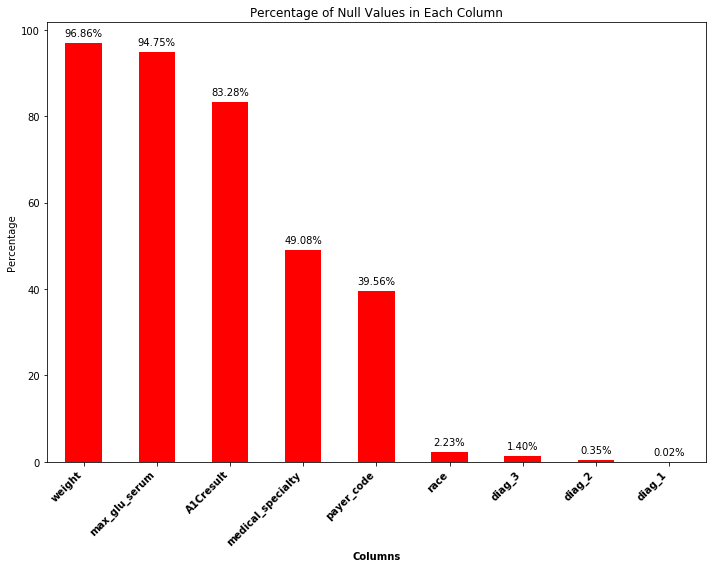

In [17]:
percentage_null = (df.isnull().sum() / len(df)) * 100

# Filter columns with null values
columns_with_null = percentage_null[percentage_null > 0].index

# Sort the DataFrame by percentage of null values in descending order
sorted_percentage_null = percentage_null[columns_with_null].sort_values(ascending=False)

# Plot the percentage bar plot with gray color and bold x-axis labels for columns with null values
plt.figure(figsize=(10, 8))
ax = sorted_percentage_null.plot(kind='bar', color='red')  # Change color to gray

# Customize x-axis labels
plt.title('Percentage of Null Values in Each Column')
plt.xlabel('Columns', fontweight='bold')  # Make x-axis labels bold
plt.ylabel('Percentage')
plt.xticks(rotation=45, ha='right', fontweight='bold')  # Rotate and make x-axis labels bold

# Add percentage labels on top of each bar for values less than 100%
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

## The conclusion is that important measures such as weight, glucose level, and others are missing in many cases. Therefore, in cases where a significant recurrence is observed, an indication of missing values is created for the remaining cases. For example, in the diagnosis, missing values will be removed from the table

In [18]:
# Specify the columns to check for null values
columns_to_check = ['race', 'diag_1', 'diag_2', 'diag_3']

# Remove rows where any of the specified columns have null values
df = df.dropna(subset=columns_to_check)

# Display the shape of the filtered DataFrame
print("Shape after removing rows with null values in specific columns:", df.shape)

Shape after removing rows with null values in specific columns: (98053, 50)


In [19]:
df.payer_code.value_counts(normalize = True)

MC    0.531110
HM    0.102454
SP    0.078692
BC    0.075462
MD    0.057197
CP    0.041113
UN    0.037528
CM    0.032370
OG    0.017132
PO    0.009843
DM    0.008845
CH    0.002418
WC    0.002063
OT    0.001590
MP    0.001302
SI    0.000879
Name: payer_code, dtype: float64

## in this case of imputaion we fill payer_code null with the most common (regard df.describe)

In [20]:
df['payer_code'].fillna('MC', inplace=True)

In [21]:
df.medical_specialty.value_counts(normalize = True).reset_index().head()

,index,medical_specialty
0,InternalMedicine,0.280828
1,Emergency/Trauma,0.150236
2,Family/GeneralPractice,0.143561
3,Cardiology,0.104916
4,Surgery-General,0.059696


## Creating Binary Indicators for Missing Values

In this section, we create binary features to indicate the presence or absence of values for specific features. Binary indicators are added for the following features:

- **medical_specialty**
- **max_glu_serum**
- **weight**
- **A1Cresult**

These binary indicators are useful for later analysis or modeling tasks, allowing us to capture whether certain information is available or missing for each record.


In [22]:
# List of features for which binary indicators will be created
features_to_indicator = ['medical_specialty', 'max_glu_serum', 'weight', 'A1Cresult']

# Create binary indicators for each feature
for feature in features_to_indicator:
    binary_feature_name = f'{feature}_indicator'
    df[binary_feature_name] = df[feature].notnull().astype(int)

## Feature Enginering 

In [23]:
# Convert 'age' to categorical with ordinal mapping
age_mapping = {'[0-10)': 1, '[10-20)': 2, '[20-30)': 3, '[30-40)': 4,
               '[40-50)': 5, '[50-60)': 6, '[60-70)': 7, '[70-80)': 8,
               '[80-90)': 9, '[90-100)': 10}

df['age'] = df['age'].replace(age_mapping)

# Convert 'weight' to categorical with ordinal mapping
weight_mapping = {'[0-25)': 1, '[25-50)': 2, '[50-75)': 3, '[75-100)': 4,
                   '[100-125)': 5, '[125-150)': 6, '[150-175)': 7,
                   '[175-200)': 8, '>200': 9}
df['weight'] = df['weight'].replace(weight_mapping)

# Replace 'gender' values with numeric codes
gender_mapping = {'Female': 0, 'Male': 1, 'Unknown/Invalid': 2}
df['gender'] = df['gender'].replace(gender_mapping)

# Mapping dictionary for 'max_glu_serum' -- the majority of this feature is null
max_glu_serum_mapping = {'Norm': 1, '>200': 2, '>300': 3}

# Replace values in 'max_glu_serum' with ordinal mapping
df['max_glu_serum'] = df['max_glu_serum'].replace(max_glu_serum_mapping)

# Mapping dictionary for 'A1Cresult' the majority of this feature is null
a1c_result_mapping = {'Norm': 1, '>7': 2, '>8': 3}

# Replace values in 'A1Cresult' with ordinal mapping
df['A1Cresult'] = df['A1Cresult'].replace(a1c_result_mapping)

# Mapping dictionary for 'readmitted'
readmitted_mapping = {'NO': 0, '>30': 2, '<30': 1}

# Replace values in 'readmitted' with ordinal mapping
df['readmitted'] = df['readmitted'].replace(readmitted_mapping)
df['readmitted'] = df['readmitted'].astype('category')
df.sample(10)

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,medical_specialty_indicator,max_glu_serum_indicator,weight_indicator,A1Cresult_indicator
44237,136390134,24967818,AfricanAmerican,1,8,NaN,3,1,1,1,MC,Cardiology,37,3,16,0,0,0,414,401,250,4,NaN,NaN,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,0,1,0,0,0
89308,288430752,39182958,AfricanAmerican,0,6,NaN,3,1,1,4,MC,Cardiology,4,0,18,0,0,0,250.6,536,357,6,NaN,NaN,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,2,1,0,0,0
85426,270421218,108462762,Caucasian,0,8,3.0,3,6,1,2,MC,Surgery-General,31,1,14,0,0,0,715,272,733,7,NaN,NaN,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,0,1,0,1,0
58225,165218898,91199754,Caucasian,0,7,NaN,3,2,1,2,BC,Cardiology,1,3,11,0,0,0,414,413,401,9,NaN,NaN,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,0,1,0,0,0
98950,407345852,67531950,Caucasian,1,5,6.0,1,1,7,4,BC,NaN,44,2,3,1,0,0,531,518,288,6,NaN,NaN,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,0,0,0,1,0
31848,101968242,112135212,Caucasian,0,9,NaN,6,1,17,2,MC,Family/GeneralPractice,47,0,12,0,0,0,780,412,401,9,NaN,NaN,Steady,No,No,No,Steady,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,Ch,Yes,0,1,0,0,0
98208,397861628,83070585,AfricanAmerican,1,7,NaN,3,1,1,4,MC,Surgery-General,55,1,25,0,1,0,241,401,V58,9,NaN,NaN,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Down,No,No,No,No,No,Ch,Yes,0,1,0,0,0
65819,183747468,102574197,AfricanAmerican,1,6,NaN,1,6,7,1,HM,NaN,40,0,6,0,0,0,415,250,714,5,NaN,NaN,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,0,0,0,0,0
6489,32040216,937512,Caucasian,1,7,NaN,3,1,1,5,MC,Surgery-Cardiovascular/Thoracic,48,3,12,0,0,0,415,250.92,512,7,NaN,3.0,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,0,1,0,0,1
35468,109900290,67883805,Caucasian,0,5,NaN,1,1,7,14,MC,Family/GeneralPractice,43,1,26,0,0,0,486,493,518,9,NaN,NaN,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,2,1,0,0,0


In [24]:
df['treatment'] = df['num_lab_procedures'] + df['num_procedures'] + df['num_medications']
df['treatment_per_day'] = df['treatment'] / df['time_in_hospital']

## EDA - Part B

## we can observe cases where the correlation coefficient is above 0.4. For example, there is a positive correlation between the number of days in the hospital and the number of medications given to the patient, which is highly reasonable.

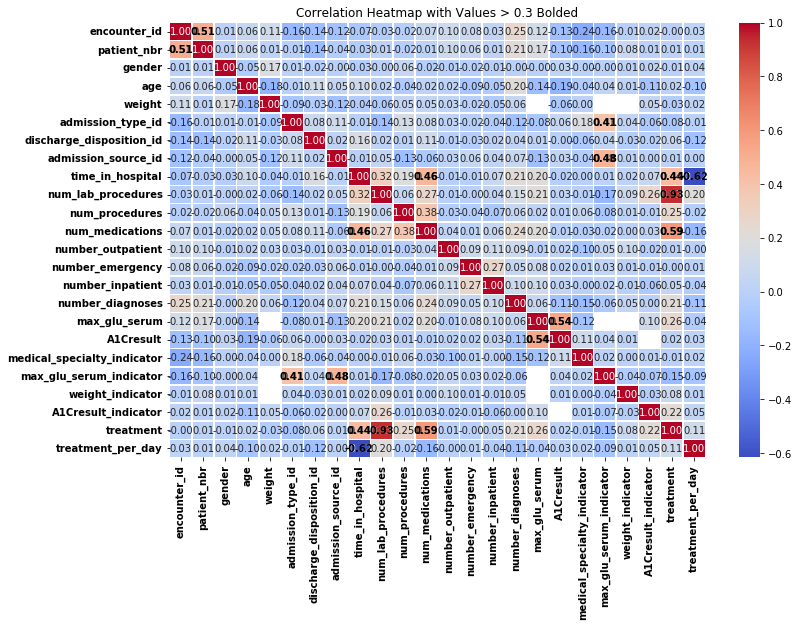

In [25]:
correlation_matrix = df.corr()

# Create a heatmap
plt.figure(figsize=(12, 8))
heatmap = sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)

# Make x-axis and y-axis tick labels bold
heatmap.set_xticklabels(heatmap.get_xticklabels(), fontweight='bold')
heatmap.set_yticklabels(heatmap.get_yticklabels(), fontweight='bold')

# Bold values greater than 0.4
for i in range(len(correlation_matrix.columns)):
    for j in range(len(correlation_matrix.index)):
        value = correlation_matrix.iloc[j, i]
        if abs(value) > 0.4 and i != j:
            text = f"{value:.2f}"
            # Apply bold only to the bolded values
            fontweight = 'bold' if (abs(value) > 0.4)  else 'normal'
            heatmap.text(i + 0.5, j + 0.5, text, ha='center', va='center', color='black', fontweight=fontweight)

plt.title('Correlation Heatmap with Values > 0.3 Bolded')
plt.show()

In [26]:
print(f"The num of dupliacted patient_nbr are :{df[df.duplicated(subset=['patient_nbr'], keep=False)].shape[0]}")

The num of dupliacted patient_nbr are :45703


In [27]:
print(f"The num of dupliacted patient_nbr are :{df[df.duplicated(subset=['encounter_id'], keep=False)].shape[0]}")

The num of dupliacted patient_nbr are :0


## Creating Indicator for Duplicated 'patient_nbr'

In this section, we create a binary indicator column named `patient_nbr_duplicated_ind`. This column takes the value 1 if the 'patient_nbr' is duplicated (appears more than once) and 0 if it is not duplicated (appears only once).

In [28]:
df['patient_nbr_duplicated_ind'] = df.duplicated(subset=['patient_nbr'], keep=False).astype(int)

In [29]:
df.sample(2)

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,medical_specialty_indicator,max_glu_serum_indicator,weight_indicator,A1Cresult_indicator,treatment,treatment_per_day,patient_nbr_duplicated_ind
897,6907938,404289,AfricanAmerican,1,5,NaN,1,1,7,11,MC,InternalMedicine,65,3,29,0,0,0,574,780,250.01,9,NaN,NaN,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,2,1,0,0,0,97,8.818182,1
76982,233031858,89564103,AfricanAmerican,0,5,NaN,3,1,1,6,OG,NaN,56,2,22,0,0,0,218,591,997,8,NaN,NaN,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,Down,No,No,No,No,No,Ch,Yes,0,0,0,0,0,80,13.333333,0


## The conclusion is that there is no difference between the genders (male, female) in the distribution of the race, which requires further examination using a statistical test

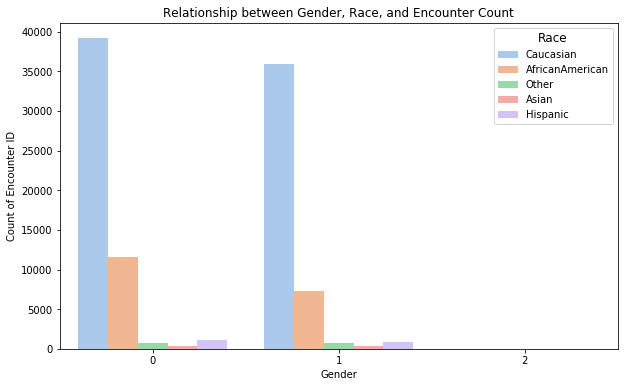

In [30]:
plt.figure(figsize=(10, 6))
sns.countplot(x='gender', hue='race', data=df, palette='pastel', dodge=True)
plt.title('Relationship between Gender, Race, and Encounter Count')
plt.xlabel('Gender')
plt.ylabel('Count of Encounter ID')
plt.legend(title='Race', title_fontsize='12', loc='upper right')
plt.show()

## there is no difference in distribution between women and men in all age groups except for older ages (70-100)
## Here as well, a comparison test like ANNOVA can be applied to examine differences in means

In [31]:
age_mapping

{'[0-10)': 1,
 '[10-20)': 2,
 '[20-30)': 3,
 '[30-40)': 4,
 '[40-50)': 5,
 '[50-60)': 6,
 '[60-70)': 7,
 '[70-80)': 8,
 '[80-90)': 9,
 '[90-100)': 10}

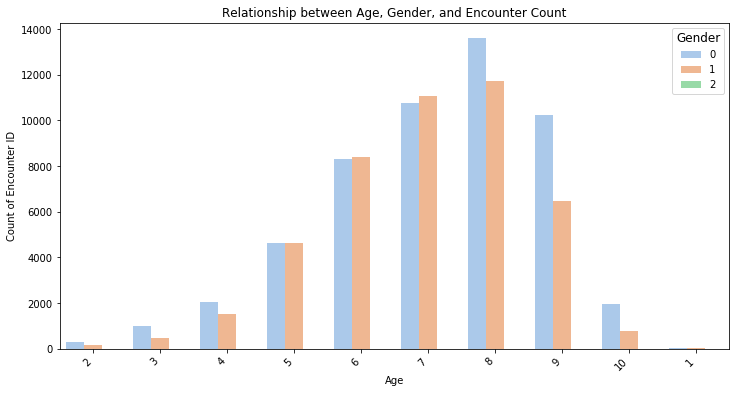

In [32]:
plt.figure(figsize=(12, 6))
sns.countplot(x='age', hue='gender', data=df, palette='pastel', order=df['age'].unique())
plt.title('Relationship between Age, Gender, and Encounter Count')
plt.xlabel('Age')
plt.ylabel('Count of Encounter ID')
plt.legend(title='Gender', title_fontsize='12', loc='upper right')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()

In [33]:
readmitted_mapping

{'NO': 0, '>30': 2, '<30': 1}

## The frequency of the number of days in the hospital up to 5 days appears to be very prominent, where it can be seen that there is a tendency to return to hospitalization within a month

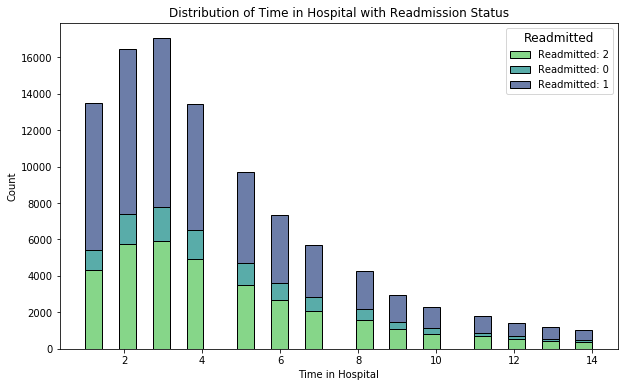

In [34]:
#df['readmitted'] = df['readmitted'].astype('category').cat.add_categories('Unknown').fillna('Unknown')

plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='time_in_hospital', kde=False, hue='readmitted', multiple="stack", palette='viridis', bins=30)

# Get unique non-NaN categories in 'readmitted'
unique_categories = df['readmitted'].dropna().unique()

# Set labels for the legend
legend_labels = [f'Readmitted: {category}' for category in unique_categories]
plt.legend(title='Readmitted', title_fontsize='12', labels=legend_labels, loc='upper right')

plt.title('Distribution of Time in Hospital with Readmission Status')
plt.xlabel('Time in Hospital')
plt.ylabel('Count')
plt.show()

In [35]:
readmitted_mapping

{'NO': 0, '>30': 2, '<30': 1}

In [36]:
gender_mapping

{'Female': 0, 'Male': 1, 'Unknown/Invalid': 2}

## According to the box plot, the range of hospital stay days in cases where there was no return to hospitalization and in cases where the return was more than a month appears  Here as well, a statistical test is required to assess the differences in durations.
## The range of hospital stay days for those who returned to hospitalization within a month appears higher and starts from 3 days for mens

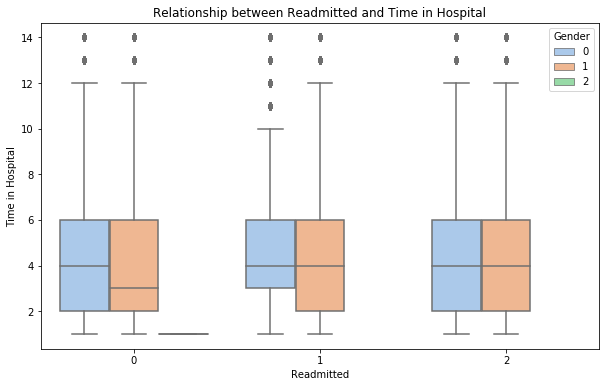

In [37]:
# Plot the relationship between 'readmitted' and 'time_in_hospital'
plt.figure(figsize=(10, 6))
sns.boxplot(x='readmitted', y='time_in_hospital', data=df, palette='pastel',hue = 'gender')
plt.title('Relationship between Readmitted and Time in Hospital')
plt.legend(title='Gender', title_fontsize='10', loc='upper right')
plt.xlabel('Readmitted')
plt.ylabel('Time in Hospital')
plt.show()

In [38]:
# Assuming df is your DataFrame
df['treatment'] = df['num_lab_procedures'] + df['num_procedures'] + df['num_medications']
df['treatment_per_day'] = df['treatment'] / df['time_in_hospital']

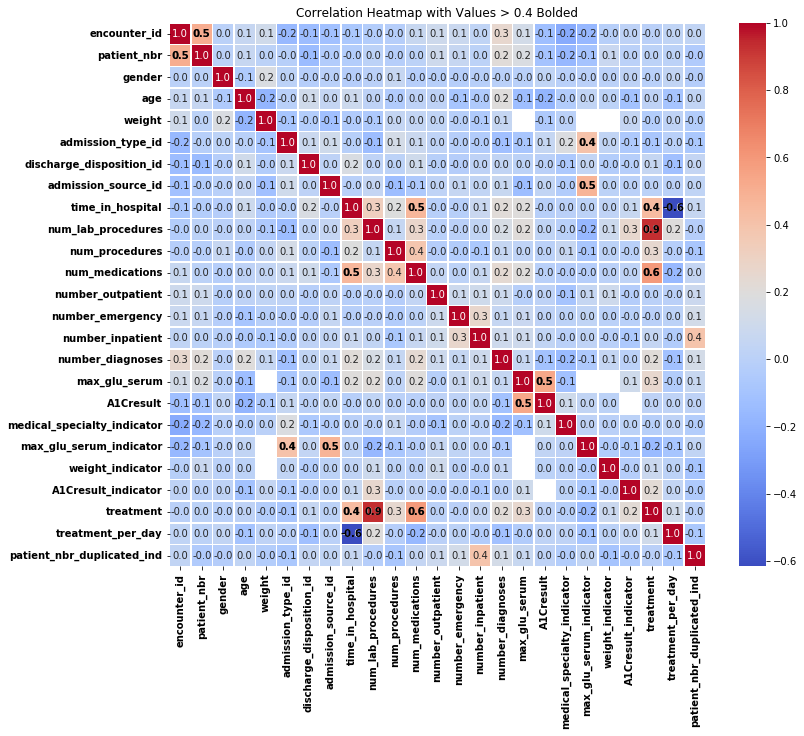

In [39]:
correlation_matrix = df.corr()

# Create a heatmap
plt.figure(figsize=(12, 10))
heatmap = sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".1f", linewidths=.5)

# Make x-axis and y-axis tick labels bold
heatmap.set_xticklabels(heatmap.get_xticklabels(), fontweight='bold')
heatmap.set_yticklabels(heatmap.get_yticklabels(), fontweight='bold')

# Bold values greater than 0.2
for i in range(len(correlation_matrix.columns)):
    for j in range(len(correlation_matrix.index)):
        value = correlation_matrix.iloc[j, i]
        if abs(value) > 0.4 and i != j:
            text = f"{value:.1f}"
            # Apply bold only to the bolded values
            fontweight = 'bold' if (abs(value) > 0.4)  else 'normal'
            heatmap.text(i + 0.5, j + 0.5, text, ha='center', va='center', color='black', fontweight=fontweight)

plt.title('Correlation Heatmap with Values > 0.4 Bolded')
plt.show()

## Regarding the new treatment index we created, which reflects the number of procedures performed on a specific patient, it seems that there is no difference between the readmission statuses

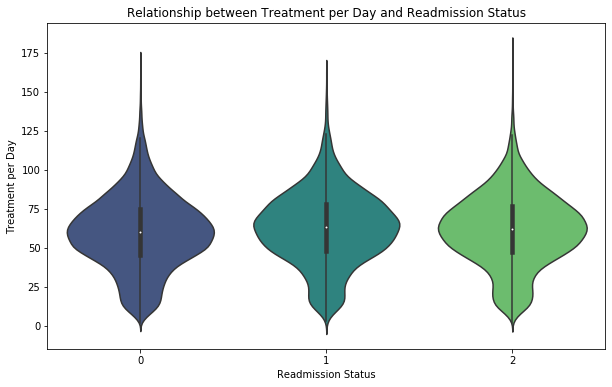

In [40]:
plt.figure(figsize=(10, 6))
sns.violinplot(data=df, x='readmitted', y='treatment', palette='viridis')
plt.title('Relationship between Treatment per Day and Readmission Status')
plt.xlabel('Readmission Status')
plt.ylabel('Treatment per Day')
plt.show()

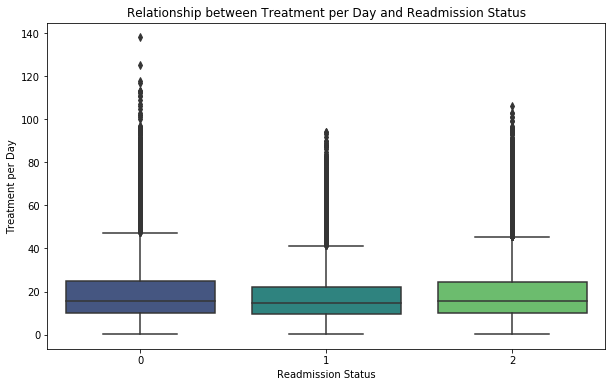

In [41]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='readmitted', y='treatment_per_day', palette='viridis')
plt.title('Relationship between Treatment per Day and Readmission Status')
plt.xlabel('Readmission Status')
plt.ylabel('Treatment per Day')
plt.show()

## Removal of outliers( regard to heatmap and to main numeric features) by the Whisker test, here are the results for the examined numerical metrics

In [42]:
# Function to remove outliers using IQR method
def remove_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    filtered_data = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]
    return filtered_data

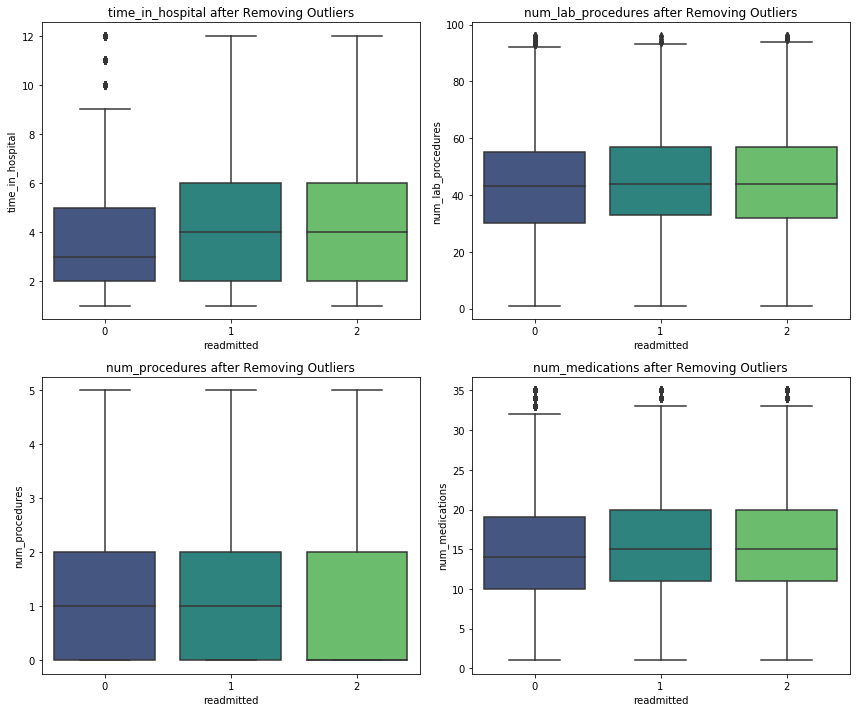

In [43]:
# List of features to remove outliers from
features_to_remove_outliers = ['time_in_hospital', 'num_lab_procedures', 'num_procedures','num_medications']
# Remove outliers for each feature
for feature in features_to_remove_outliers:
    df = remove_outliers_iqr(df, feature)

# Plot the box plots after removing outliers
plt.figure(figsize=(12, 10))

for i, feature in enumerate(features_to_remove_outliers, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x='readmitted', y=feature, data=df, palette='viridis')
    plt.title(f'{feature} after Removing Outliers')

plt.tight_layout()
plt.show()

## part 3 - feature engineering

In [44]:
readmitted_mapping

{'NO': 0, '>30': 2, '<30': 1}

In [45]:
df.readmitted.value_counts()

0    47700
2    31987
1    10169
Name: readmitted, dtype: int64

In [46]:
print("Columns with Missing Values:")
round(df[columns_with_missing_values].isna().sum() / df.shape[0]*100,2)

Columns with Missing Values:


race                  0.00
weight               96.93
payer_code            0.00
medical_specialty    49.44
diag_1                0.00
diag_2                0.00
diag_3                0.00
max_glu_serum        94.38
A1Cresult            83.82
dtype: float64

## Feture selection - numric represntion

In [47]:
df_final = df.copy()
# List of columns to remove (diag is alfhanumeric in sum places so we can drop this column for our model)
columns_to_remove = ['weight', 'medical_specialty', 'max_glu_serum', 'A1Cresult','diag_1','diag_2','diag_3']

# Drop the specified columns from df_final
df_final = df_final.drop(columns=columns_to_remove)
df_final.shape

(89856, 50)

In [48]:
# Assuming df_final is your DataFrame
selected_columns = ['race','payer_code','metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride',
                     'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone',
                     'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone', 'tolazamide',
                     'examide', 'citoglipton', 'insulin', 'glyburide-metformin',
                     'glipizide-metformin', 'glimepiride-pioglitazone',
                     'metformin-rosiglitazone', 'metformin-pioglitazone', 'change', 'diabetesMed']

df_final = pd.get_dummies(df_final, columns=selected_columns, drop_first=True)

# Display the updated DataFrame
df_final.head()

,encounter_id,patient_nbr,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,readmitted,medical_specialty_indicator,max_glu_serum_indicator,weight_indicator,A1Cresult_indicator,treatment,treatment_per_day,patient_nbr_duplicated_ind,race_Asian,race_Caucasian,race_Hispanic,race_Other,payer_code_CH,payer_code_CM,payer_code_CP,payer_code_DM,payer_code_HM,payer_code_MC,payer_code_MD,payer_code_MP,payer_code_OG,payer_code_OT,payer_code_PO,payer_code_SI,payer_code_SP,payer_code_UN,payer_code_WC,metformin_No,metformin_Steady,metformin_Up,repaglinide_No,repaglinide_Steady,repaglinide_Up,nateglinide_No,nateglinide_Steady,nateglinide_Up,chlorpropamide_No,chlorpropamide_Steady,chlorpropamide_Up,glimepiride_No,glimepiride_Steady,glimepiride_Up,glipizide_No,glipizide_Steady,glipizide_Up,glyburide_No,glyburide_Steady,glyburide_Up,tolbutamide_Steady,pioglitazone_No,pioglitazone_Steady,pioglitazone_Up,rosiglitazone_No,rosiglitazone_Steady,rosiglitazone_Up,acarbose_No,acarbose_Steady,acarbose_Up,miglitol_No,miglitol_Steady,miglitol_Up,troglitazone_Steady,tolazamide_Steady,tolazamide_Up,insulin_No,insulin_Steady,insulin_Up,glyburide-metformin_No,glyburide-metformin_Steady,glyburide-metformin_Up,glipizide-metformin_Steady,glimepiride-pioglitazone_Steady,metformin-pioglitazone_Steady,change_No,diabetesMed_Yes
1,149190,55629189,0,2,1,1,7,3,59,0,18,0,0,0,9,2,0,0,0,0,77,25.666667,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1
2,64410,86047875,0,3,1,1,7,2,11,5,13,2,0,1,6,0,0,0,0,0,29,14.500000,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,1
3,500364,82442376,1,4,1,1,7,2,44,1,16,0,0,0,7,0,0,0,0,0,61,30.500000,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1
4,16680,42519267,1,5,1,1,7,1,51,0,8,0,0,0,5,0,0,0,0,0,59,59.000000,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1
6,55842,84259809,1,7,3,1,2,4,70,1,21,0,0,0,7,0,0,0,0,0,92,23.000000,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1


In [49]:
df_final.shape

(89856, 90)

### Note : there is unbalanced data between clasification

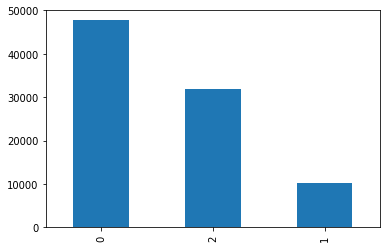

In [50]:
df_final.readmitted.value_counts().plot(kind = 'bar')

## Split the data to train and test

In [51]:
X = df_final.drop(columns=['readmitted'])  # Drop the target variable
y = df_final['readmitted']

# Importing the necessary library for splitting the data
from sklearn.model_selection import train_test_split

# Splitting the data into training and testing sets
# Adjust the test_size parameter based on the proportion you want for your test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the resulting sets
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (71884, 89)
Shape of X_test: (17972, 89)
Shape of y_train: (71884,)
Shape of y_test: (17972,)


## Data Normalization using min_max scaler / StandardScaler

In [52]:
scalar = MinMaxScaler()
#scaler = StandardScaler()
print('Max before normalization: ',X_train.max())
print('Min before normalization: ',X_train.min())
##### fit and tarnsform
X_train = scalar.fit_transform(X_train)
X_test = scalar.transform(X_test)
###############################
print('train - Max after normalization : ',X_train.max())
print('train -Min after normalization: ',X_train.min())

Max before normalization:  encounter_id                       443857166.0
patient_nbr                        189502619.0
gender                                     2.0
age                                       10.0
admission_type_id                          8.0
                                      ...     
glipizide-metformin_Steady                 1.0
glimepiride-pioglitazone_Steady            1.0
metformin-pioglitazone_Steady              1.0
change_No                                  1.0
diabetesMed_Yes                            1.0
Length: 89, dtype: float64
Min before normalization:  encounter_id                       15738.0
patient_nbr                          135.0
gender                                 0.0
age                                    1.0
admission_type_id                      1.0
                                    ...   
glipizide-metformin_Steady             0.0
glimepiride-pioglitazone_Steady        0.0
metformin-pioglitazone_Steady          0.0
change_No      

### KNN Classifier is very rebust and not fit to this amount of data

In [53]:
# score test
#k_list = []

# Iterate over different values of k
#for k in range(3, 10, 2):
    #knn1 = KNeighborsClassifier(n_neighbors=k)
    #knn1.fit(X_train, y_train)
    
    # Append the accuracy score to k_list
    #k_list.append(knn1.score(X_test, y_test))
    
    # Print the results
   # print(f'The k neighbors are: {k} and the score is: {round(knn1.score(X_test, y_test), 3)}')

### Choosing a RandomForestClassifier for the model

In [54]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from tqdm import tqdm


# Initialize and train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=200, random_state=42)

# Training loop with tqdm progress bar
with tqdm(total=100, desc="Training Random Forest") as pbar:
    rf_model.fit(X_train, y_train)
    pbar.update(100)  # Update progress bar to 100% after training

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Test Accuracy: {accuracy:.4f}')

# Print classification report for detailed performance metrics
print("Classification Report:")
print(classification_report(y_test, y_pred))

Training Random Forest: 100%|████████████████████████████████████████████████████████| 100/100 [00:45<00:00,  2.18it/s]


Test Accuracy: 0.6954
Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.85      0.80      9565
           1       0.48      0.02      0.05      2016
           2       0.60      0.68      0.64      6391

    accuracy                           0.70     17972
   macro avg       0.61      0.52      0.50     17972
weighted avg       0.67      0.70      0.66     17972



## Examine also XGBClassifier

In [55]:
from xgboost import XGBClassifier

# Initialize and train the XGBoost model
xgb_model = XGBClassifier(n_estimators=200, random_state=42)

# Training loop with tqdm progress bar
with tqdm(total=100, desc="Training XGBoost") as pbar:
    xgb_model.fit(X_train, y_train)
    pbar.update(100)  # Update progress bar to 100% after training

# Make predictions on the test set
y_pred = xgb_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Test Accuracy: {accuracy:.4f}')

# Print classification report for detailed performance metrics
print("Classification Report:")
print(classification_report(y_test, y_pred))

Training XGBoost: 100%|██████████████████████████████████████████████████████████████| 100/100 [00:44<00:00,  2.23it/s]


Test Accuracy: 0.6957
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.84      0.80      9565
           1       0.42      0.08      0.13      2016
           2       0.61      0.67      0.64      6391

    accuracy                           0.70     17972
   macro avg       0.60      0.53      0.52     17972
weighted avg       0.67      0.70      0.67     17972



## Using this model, we can see the influential metrics. It is apparent that the indicator we created for readmissions in the dataset, meaning if there is more than one record, is significant. Of course, there are other methods such as SHAP.

In [56]:
importances = pd.DataFrame(data={
    'Attribute': df_final.iloc[:,1:].columns,
    'Importance': xgb_model.feature_importances_
})
importances = importances.sort_values(by='Importance', ascending=False)

In [57]:
importances

,Attribute,Importance
21,patient_nbr_duplicated_ind,0.405637
13,number_diagnoses,0.048830
17,weight_indicator,0.023797
5,admission_source_id,0.020648
31,payer_code_MC,0.017207
...,...,...
75,troglitazone_Steady,0.000000
74,miglitol_Up,0.000000
83,glyburide-metformin_Up,0.000000
85,glimepiride-pioglitazone_Steady,0.000000


## Model Evaluation

C:\Users\avraham\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


<Figure size 864x576 with 0 Axes>

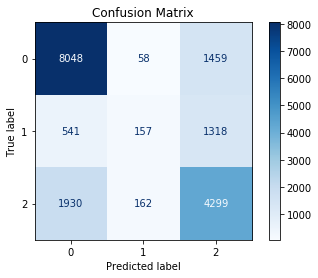

In [58]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix

# Plot confusion matrix with enlarged size
plt.figure(figsize=(12, 8))
conf_matrix = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(xgb_model, X_test, y_test, cmap=plt.cm.Blues, display_labels=xgb_model.classes_)
plt.title('Confusion Matrix')
plt.show()

## We can improve our results by :

## Feature Engineering:

Carefully analyze and preprocess your features. Consider creating new features or transforming existing ones to better capture patterns in the data.
Use techniques like one-hot encoding or label encoding for categorical variables.
Explore interactions between features.
Model Selection:

## Experiment with different algorithms. Some models may perform better on specific types of data or tasks.
Consider ensemble methods such as Random Forests or Gradient Boosting.
Hyperparameter Tuning:

## Optimize the hyperparameters of your chosen model using techniques like grid search or randomized search.
Adjust parameters such as learning rate, regularization strength, and tree depth.
Data Augmentation:

If you have a limited amount of data, consider data augmentation techniques to create additional training examples.
Class Imbalance:

## there is class imbalance, use techniques like oversampling the minority class or undersampling the majority class to balance the class distribution.


## Use cross-validation to get a better estimate of your model's performance. This helps ensure that your model generalizes well to new, unseen data.



## Apply regularization techniques to prevent overfitting. This is especially important if you have a large number of features.


In [59]:
######################################################################

# Part 2 - Productizing an ML project with Docker and Kubernetes

## 1.Containerize the ML Model:

Package ML model and dependencies into a Docker container.

## 2. Build Docker Image:

Use Docker to build an image from the Dockerfile.

## 3.Push Image to Registry:

Push the Docker image to a container registry.
## 4.Kubernetes Deployment:

Create Kubernetes deployment files for ML model deployment.
## 5.Create Kubernetes Cluster:

Set up a Kubernetes cluster (e.g., GKE, EKS, AKS).
## 6.Deploy ML Model:

Use kubectl to deploy the ML model to Kubernetes.
## 7. Expose Service:

Expose the ML model service using a Kubernetes service.
## 8.Scale and Monitor:

Monitor performance and scale replicas based on demand.
## 9.CI/CD Pipeline:

Set up a CI/CD pipeline for automated builds and deployments.
## 10. Secrets and Configurations:

Use Kubernetes Secrets for sensitive information.
## 11.Update and Rollback:

Implement rolling updates and rollback strategies.
## 12.Logging and Monitoring:

Set up logging and monitoring solutions (e.g., Prometheus, Grafana).
## 13.Security:

Implement RBAC and security best practices.
## 14.Network Policies:

Define network policies for controlled communication.
## 15.Backup and Recovery:

Establish backup and recovery procedures.
## 16. Documentation:

Document deployment process and configurations.